In [1]:
 # These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu"

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib notebook

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Model definition

In [2]:
with pm.Model() as model:
    mu = pm.Normal('$\mu$', 10, 5)
    sigma = pm.Gamma('$\sigma$', 1, .7)
    y = pm.Normal('$y$', mu, sigma, observed=[7])
  

In [3]:
mu

$\mu$

In [4]:
sigma

$\sigma$

In [5]:
y

$y$

## Sampling

In [6]:
with model:
    prior = pm.sample_prior_predictive(1000)
    trace = pm.sample(1000)
    post = pm.sample_posterior_predictive(trace)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\sigma$, $\mu$]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 5462.04draws/s]
There were 36 divergences after tuning. Increase `target_accept` or reparameterize.
There were 47 divergences after tuning. Increase `target_accept` or reparameterize.
There were 64 divergences after tuning. Increase `target_accept` or reparameterize.
There were 78 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7063349420527014, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
100%|██████████| 4000/4000 [00:01<00:00, 2276.78it/s]


In [7]:
import arviz as az

data = az.from_pymc3(trace=trace,
                     prior=prior,
                     posterior_predictive=post)
dataa = data
type(data)

arviz.data.inference_data.InferenceData

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79eca63470>,
      dtype=object)

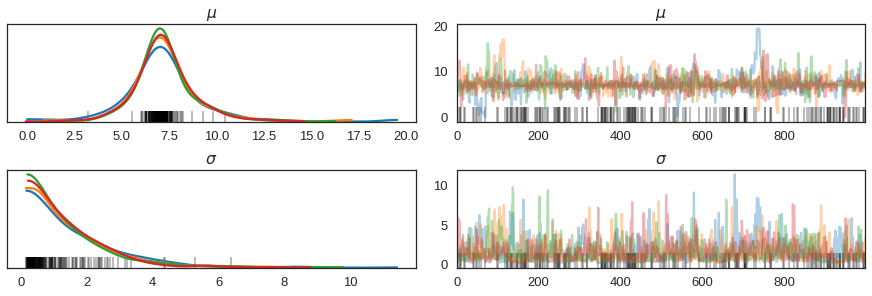

In [8]:
az.plot_trace(data)

In [9]:
data

Inference data with groups:
	> posterior
	> sample_stats
	> posterior_predictive
	> prior
	> observed_data

In [10]:
# !git pull
from gempy.bayesian import plot_posterior as pp

import seaborn as sns


<IPython.core.display.Javascript object>


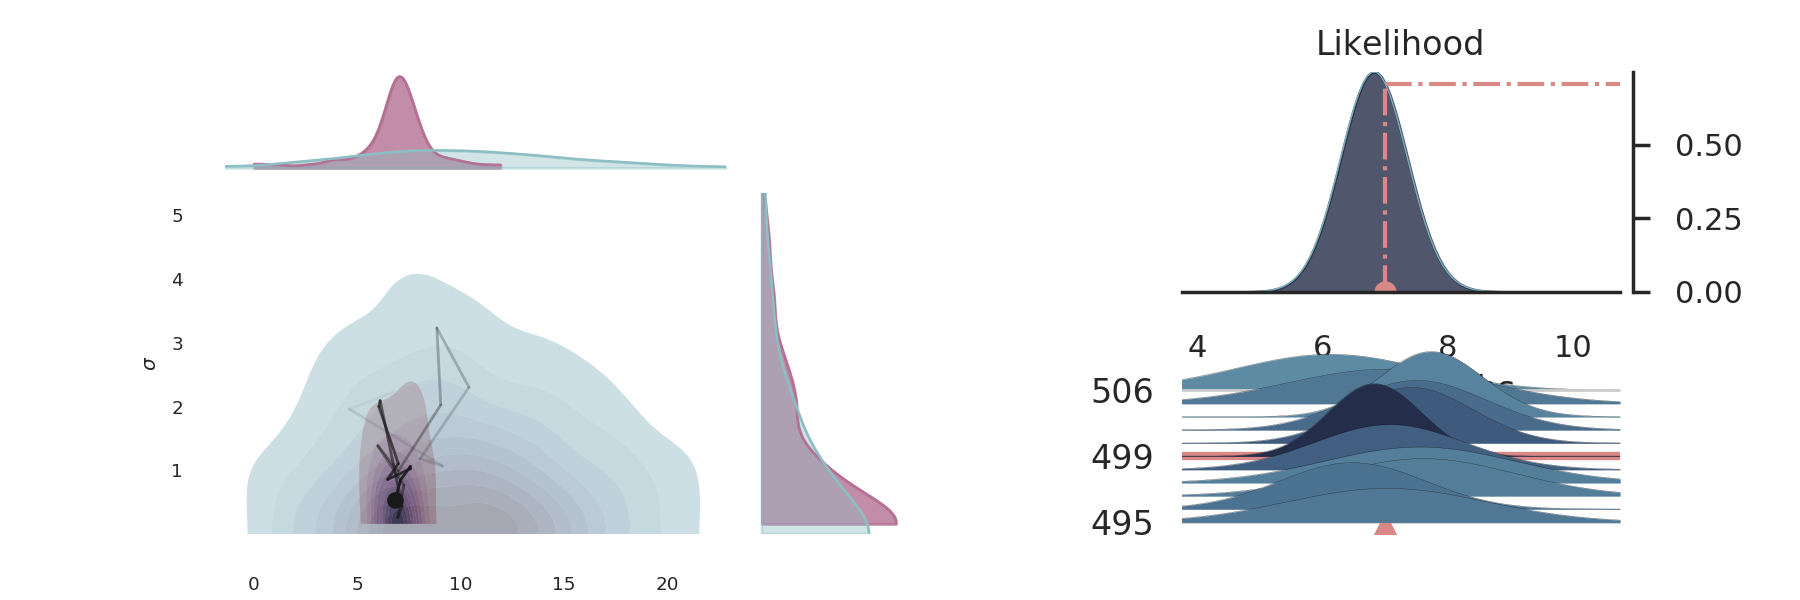

In [11]:
%matplotlib notebook
from importlib import reload
reload(pp)
p = pp.PlotPosterior(dataa)
p.create_figure(figsize=(9,3), joyplot=True)

In [12]:
def change_iteration(iteration):
    p.plot_posterior(['$\mu$', '$\sigma$'], ['$\mu$', '$\sigma$'], '$y$', iteration)

In [13]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(change_iteration, iteration=(0, 1000, 1))

interactive(children=(IntSlider(value=500, description='iteration', max=1000), Output()), _dom_classes=('widge…

<function __main__.change_iteration(iteration)>

In [15]:
from gempy.bayesian.plot_posterior import my_cmap_full

<IPython.core.display.Javascript object>


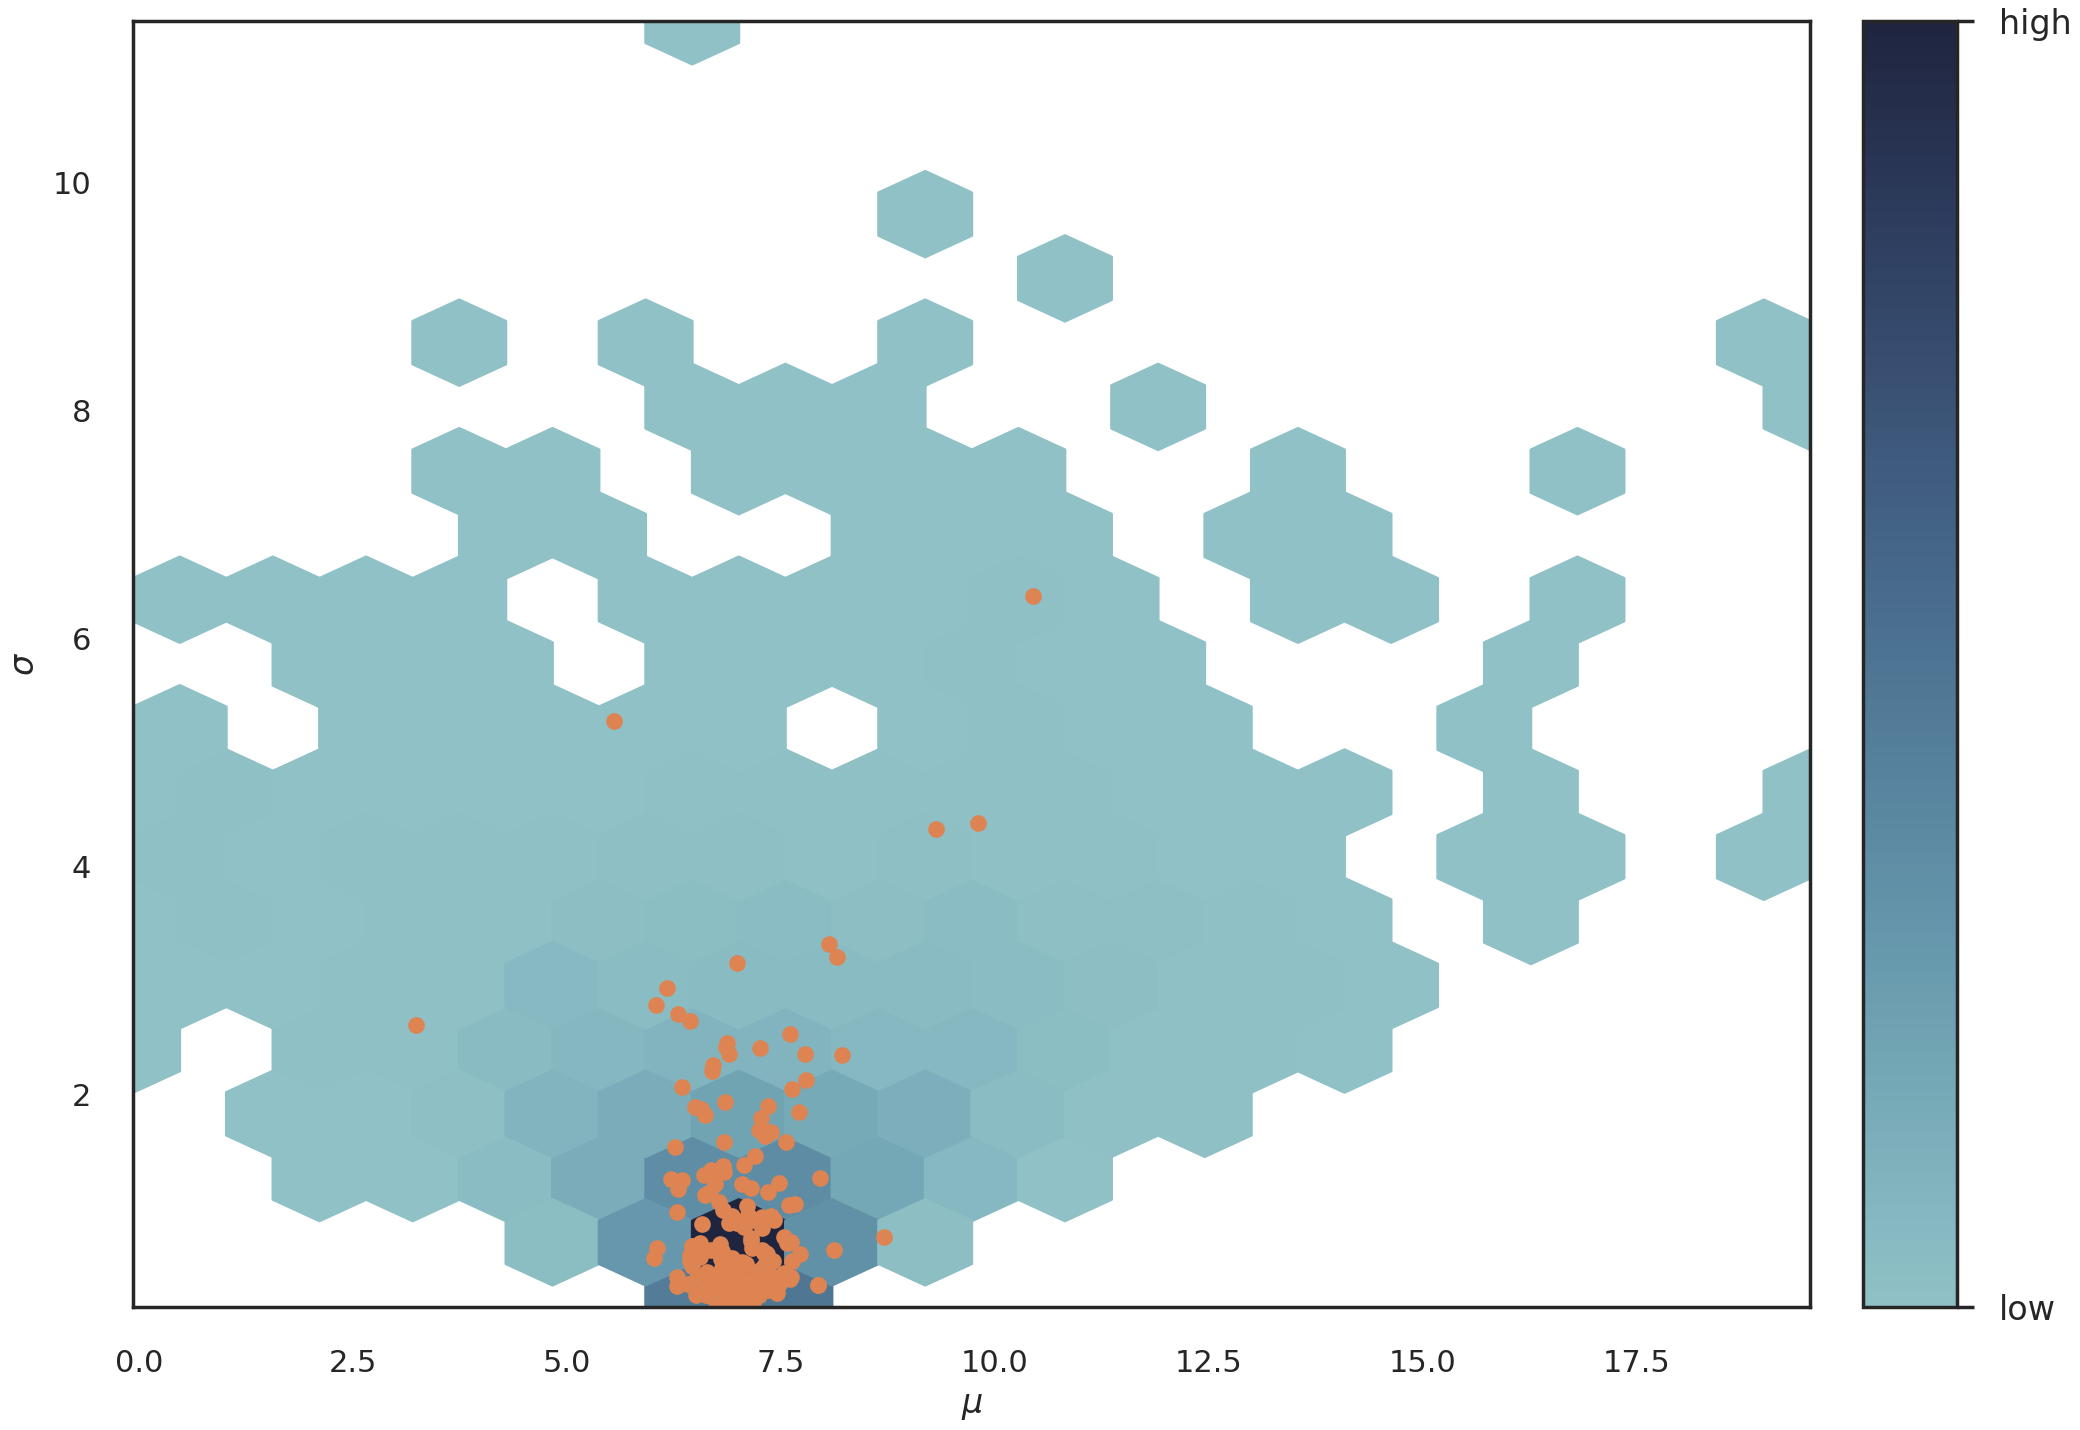

In [16]:
az.plot_pair(data, divergences=True, var_names=['$\mu$', '$\sigma$', '$y$'], kind='hexbin', contour=True,
            colorbar=True, plot_kwargs={'cmap':my_cmap_full});